<a href="https://colab.research.google.com/github/Valepowell/Optimizacion_Hiperparametros_Core/blob/main/Clasificaci%C3%B3n_y_Optimizaci%C3%B3n_de_Hiperpar%C3%A1metros_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis Exploratorio de Datos (EDA) Inicial:
- Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
- Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
- Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/drive/MyDrive/BBDD/insurance.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.columns = df.columns.str.lower().str.strip()

In [6]:
# Revisar duplicados.
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [9]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
# Verificar valores nulos
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [15]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [16]:
df['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


In [28]:
df['charges'].value_counts()

,count
charges,
1639.56310,2
2221.56445,1
19798.05455,1
13063.88300,1
13555.00490,1
...,...
1149.39590,1
37079.37200,1
4738.26820,1


In [109]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [111]:
from sklearn.impute import SimpleImputer

# Ejemplo: Imputar BMI con la mediana
if df['bmi'].isnull().sum() > 0:
    imputer = SimpleImputer(strategy='median')
    df['bmi'] = imputer.fit_transform(df[['bmi']])

# imputar todas las numéricas de una vez:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

In [112]:
# Escalar variables numéricas con StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Diagnóstico y Selección de Problema:
- Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
- Justificar la elección del problema y explicar por qué es relevante y desafiante.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Se eliminaran las columnas de CO sobre 800 ya que sobre ese nivel es letal.
# Eliminamos Outlinear y vemos el tamaño de la data.
df_1 = df_1[df_1["co"] < 800]
df_1

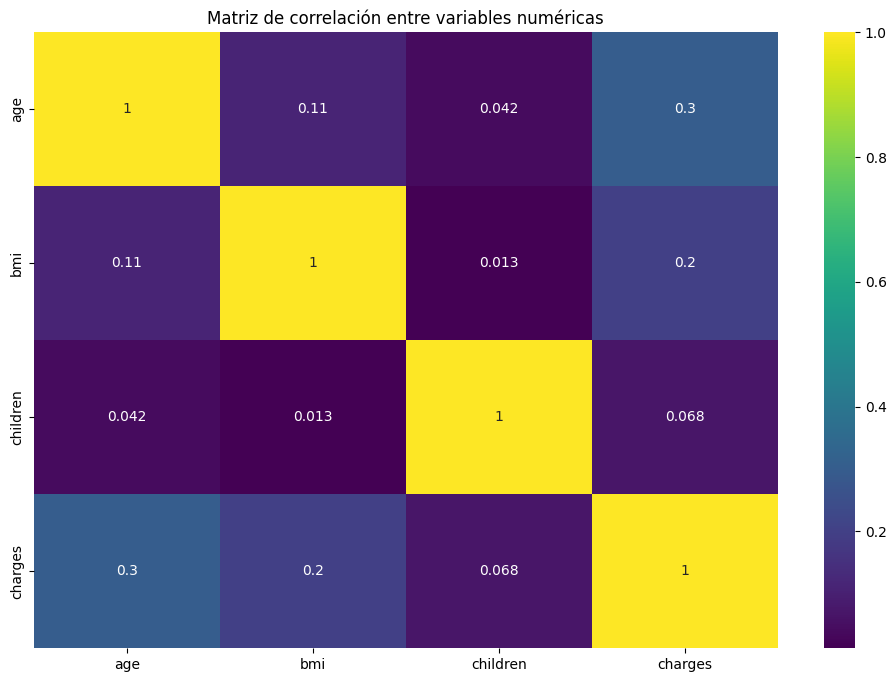

In [22]:
# Correlación numérica generadas con las columnas númericas
num_df = df_1.select_dtypes(include=[np.number])
correlacion_matriz = num_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlacion_matriz, annot=True, cmap='viridis')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

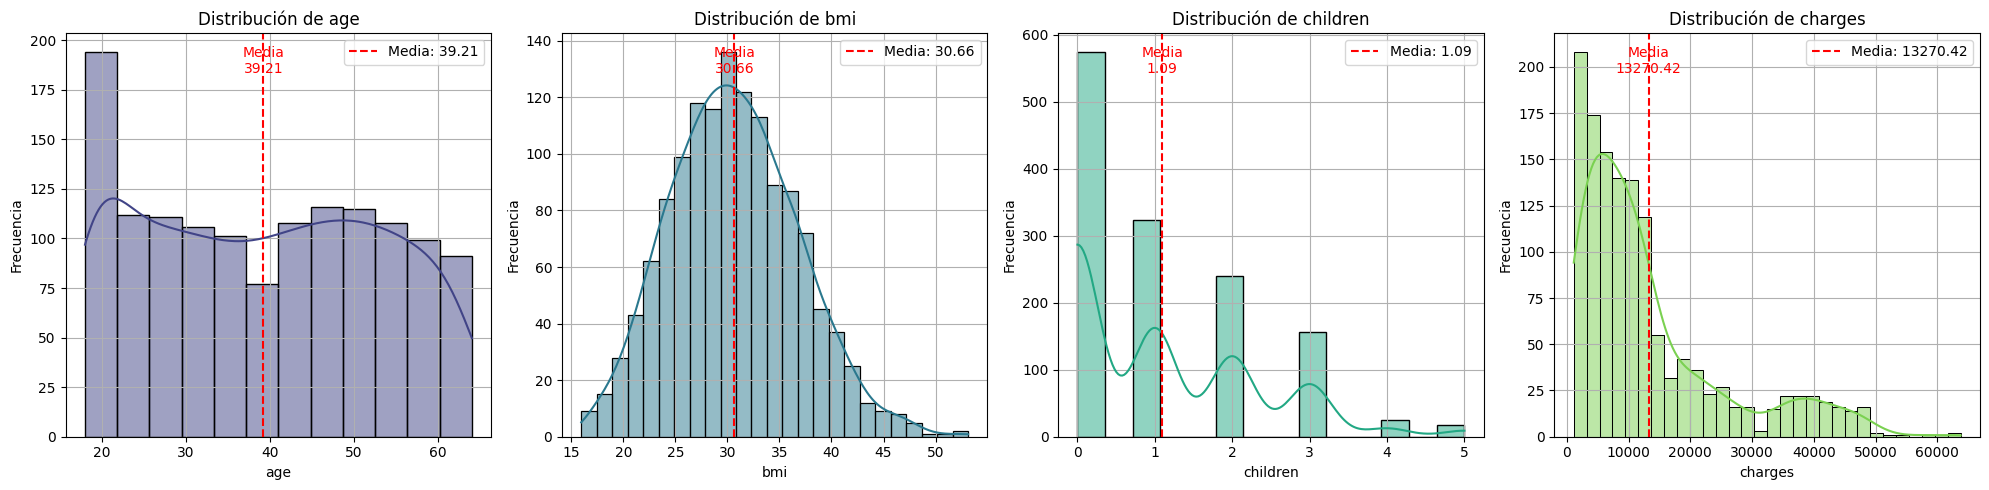

In [23]:
# generar un cor diferente para cada grafico
colors = sns.color_palette("viridis", len(num_df.columns))

# Create a grid of subplots
n_cols = 4  # Number of columns in the subplot grid
n_rows = (len(num_df.columns) + n_cols - 1) // n_cols # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, color=colors[i], ax=axes[i])
    axes[i].set_title("Distribución de " + col, fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel("Frecuencia", fontsize=10)
    # agregar la grilla
    axes[i].grid(True, linestyle='-')
    # poner anotación de la media de cada grafico
    media = num_df[col].mean()
    axes[i].axvline(media, color='red', linestyle='--', label=f"Media: {media:.2f}")
    axes[i].text(media, axes[i].get_ylim()[1]*0.9, f'Media\n{media:.2f}',
             color='red', ha='center')

    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

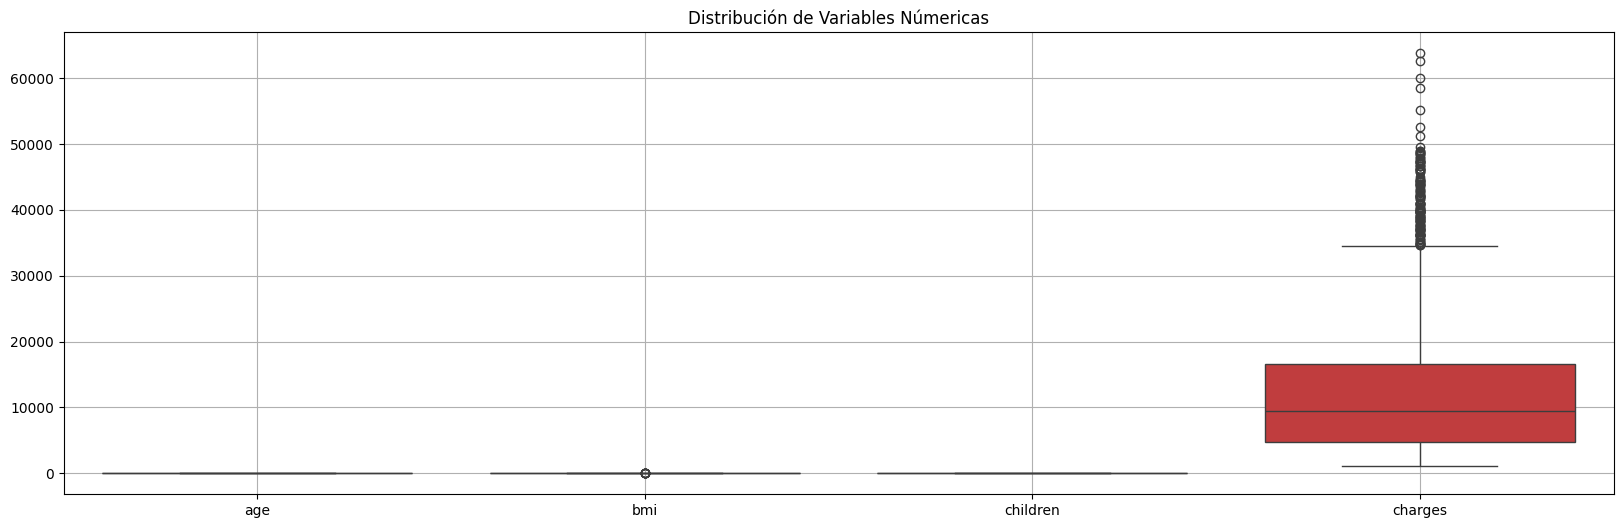

In [29]:
# Visualization 2: Boxplot para las variables numericas
#color = sns.color_palette("viridis")[1]
plt.figure(figsize=(20, 6))
sns.boxplot(data=num_df)
plt.title("Distribución de Variables Númericas")
plt.gca().grid(True, linestyle='-')
plt.show()

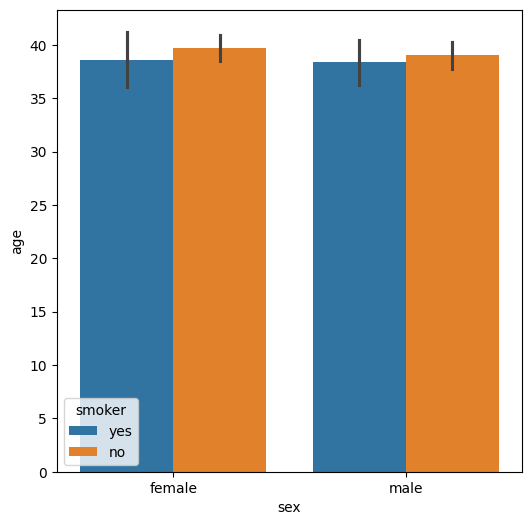

In [98]:
plt.figure(figsize=(6,6))
sns.barplot(x="sex", y="age", hue="smoker", data=df)
plt.show()

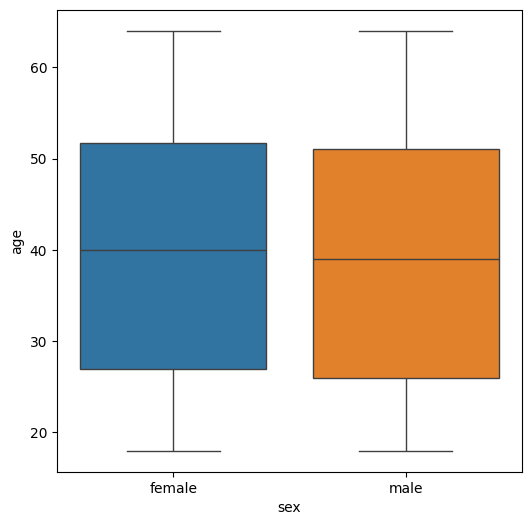

In [97]:
plt.figure(figsize=(6,6))
sns.boxplot(x="sex", y="age",hue="sex", data=df)
plt.show()

# 2.- Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).

In [231]:
# Variables categóricas y numéricas
cat_cols = df_1.select_dtypes(include=['object']).columns.tolist()
num_cols = df_1.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nVariables categóricas:", cat_cols)
print("\nVariables numéricas:", num_cols)


Variables categóricas: ['sex', 'smoker', 'region']

Variables numéricas: ['age', 'bmi', 'children', 'charges']


In [232]:
# Variables categóricas
cat =  ['sex', 'smoker', 'region']

# Variables numéricas
num = ['age', 'bmi', 'children']

In [233]:
# Features finales
X = df_1.drop(columns=['charges'])
y = df_1['charges']

In [234]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

In [235]:
# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
    ]
)

In [236]:
df_1[num]

,age,bmi,children
0,-1.438764,-0.453320,-0.908614
1,-1.509965,0.509621,-0.078767
2,-0.797954,0.383307,1.580926
3,-0.441948,-1.305531,-0.908614
4,-0.513149,-0.292556,-0.908614
...,...,...,...
1333,0.768473,0.050297,1.580926
1334,-1.509965,0.206139,-0.908614
1335,-1.509965,1.014878,-0.908614
1336,-1.296362,-0.797813,-0.908614


In [237]:
df_1[cat]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [238]:
# Separar datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Regresión Lineal**

In [239]:
# Pipeline completo para Regresión Logística
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', LogisticRegression(max_iter=1000))  # Cambiado a LogisticRegression
])

In [240]:
# Entrenar el modelo de Regresión Logística
pipeline_lr.fit(X_train_cls, y_train_cls)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children',
                                                   'charges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [241]:
# Evaluar
score_lr = pipeline_lr.score(X_test_cls, y_test_cls)
print(f"Score de Regresión Logística: {score_lr:.3f}")

Score de Regresión Logística: 0.966


In [242]:
from sklearn.metrics import classification_report

# Predecir en test
y_pred_lr = pipeline_lr.predict(X_test_cls)

# Métricas para Regresión Logística
print("Reporte de Clasificación para Regresión Logística:")
print(classification_report(y_test_cls, y_pred_lr))

Reporte de Clasificación para Regresión Logística:
              precision    recall  f1-score   support

          no       0.99      0.97      0.98       214
         yes       0.89      0.94      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



In [224]:
num_features_reg = X_regression.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features_reg = X_regression.select_dtypes(include=['object']).columns.tolist()

print("Numerical features for regression:", num_features_reg)
print("Categorical features for regression:", cat_features_reg)

Numerical features for regression: ['age', 'bmi', 'children']
Categorical features for regression: ['sex', 'smoker', 'region']


**Regresión Lineal R2**

In [243]:
preprocessor_reg = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features_reg),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_reg)
    ],
    remainder='passthrough' # Keep other columns (if any)
)

X_regression_processed = preprocessor_reg.fit_transform(X_regression)

In [244]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression_processed, y_regression, test_size=0.2, random_state=42)

In [245]:
#from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_reg, y_train_reg)

LinearRegression()

In [246]:
#from sklearn.metrics import mean_squared_error, r2_score

y_pred_reg = linear_reg_model.predict(X_test_reg)

mse = mean_squared_error(y_test_reg, y_pred_reg)
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")

r2 = r2_score(y_test_reg, y_pred_reg)
print(f"R-squared: {r2:.4f}")

Error Cuadrático Medio (MSE): 0.2293
R-squared: 0.7836


**Árbol desición**

In [94]:
# Pipeline de preprocesamiento
preprocessor_cls = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features_cls),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_cls)
    ])

In [83]:
# Pipeline con DecisionTree Classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', DecisionTreeClassifier(random_state=42)) # Cambiado a DecisionTreeClassifier
])

In [84]:
# Entrenar el modelo de Árbol de Decisión
pipeline_dt.fit(X_train_cls, y_train_cls)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children',
                                                   'charges']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'region'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [85]:
# Predecir en test
y_pred_dt = pipeline_dt.predict(X_test_cls)

In [86]:
# Métricas para Árbol de Decisión
print("Reporte de Clasificación para Árbol de Decisión:")
print(classification_report(y_test_cls, y_pred_dt))

Reporte de Clasificación para Árbol de Decisión:
              precision    recall  f1-score   support

          no       0.99      0.98      0.98       214
         yes       0.91      0.94      0.93        54

    accuracy                           0.97       268
   macro avg       0.95      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



KNN

In [107]:
# Pipeline con KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', KNeighborsClassifier())  # Cambiado a KNeighborsClassifier
])

# Definir parámetros a buscar para KNN
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9],
}

# GridSearchCV con validación cruzada para KNN
grid_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train_cls, y_train_cls)

best_knn = grid_knn.best_estimator_
print("Mejor KNN:", grid_knn.best_params_)

# Evaluar el mejor modelo KNN
y_pred_knn = best_knn.predict(X_test_cls)
print("\nReporte de Clasificación para KNN:")
print(classification_report(y_test_cls, y_pred_knn))

Mejor KNN: {'classifier__n_neighbors': 3}

Reporte de Clasificación para KNN:
              precision    recall  f1-score   support

          no       0.95      0.97      0.96       214
         yes       0.86      0.81      0.84        54

    accuracy                           0.94       268
   macro avg       0.91      0.89      0.90       268
weighted avg       0.94      0.94      0.94       268



**Gridserch**

Regresión Logística

In [189]:
# Pipeline con Logistic Regression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Definir parámetros a buscar para Logistic Regression
param_grid_lr = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train_cls, y_train_cls)

best_lr = grid_lr.best_estimator_
print("Mejor Logistic Regression:", grid_lr.best_params_)

# Evaluar el mejor modelo Logistic Regression
y_pred_lr = best_lr.predict(X_test_cls)
print("\nReporte de Clasificación para Logistic Regression:")
print(classification_report(y_test_cls, y_pred_lr))

Mejor Logistic Regression: {'classifier__C': 1, 'classifier__solver': 'liblinear'}

Reporte de Clasificación para Logistic Regression:
              precision    recall  f1-score   support

          no       0.99      0.97      0.98       214
         yes       0.89      0.94      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268



In [196]:
# Dividir datos Target Smoker
X = df_1.drop(columns=['smoker'])
y = df_1['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el pipeline con el preprocesador y el modelo de Regresión Logística
pipeline_lr_grid = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', LogisticRegression(max_iter=1000))
])

# 📌 GridSearchCV
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'lbfgs'],
    'classifier__penalty': ['l2']
}

grid_lr2 = GridSearchCV(pipeline_lr_grid, param_grid, cv=5, scoring='accuracy')
grid_lr2.fit(X_train, y_train)

print("Mejores parámetros (GridSearchCV):", grid_lr2.best_params_)
print("Mejor score (GridSearchCV):", grid_lr2.best_score_)

Mejores parámetros (GridSearchCV): {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Mejor score (GridSearchCV): 0.9514018691588785


In [200]:
# Dividir datos Target Smoker
X = df_1.drop(columns=['smoker'])
y = df_1['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con DecisionTree Classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', DecisionTreeClassifier(random_state=42)) # Cambiado a DecisionTreeClassifier
])

# 📌 GridSearchCV
param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__criterion': ['gini', 'entropy']
}

grid_ar2 = GridSearchCV(pipeline_dt, param_grid, cv=5, scoring='accuracy')
grid_ar2.fit(X_train, y_train)

print("Mejores parámetros (GridSearchCV):", grid_ar2.best_params_)
print("Mejor score (GridSearchCV):", grid_ar2.best_score_)

Mejores parámetros (GridSearchCV): {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Mejor score (GridSearchCV): 0.9682242990654206


In [204]:
# Dividir datos Target Smoker
X = df_1.drop(columns=['smoker'])
y = df_1['smoker']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pipeline con KNN
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', KNeighborsClassifier())  # Cambiado a KNeighborsClassifier
])

# 📌 GridSearchCV
param_grid = {
    'classifier__n_neighbors': list(range(3, 21)),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn2 = GridSearchCV(pipeline_knn, param_grid, cv=5, scoring='accuracy')
grid_knn2.fit(X_train, y_train)

print("Mejores parámetros (GridSearchCV):", grid_knn2.best_params_)
print("Mejor score (GridSearchCV):", grid_knn2.best_score_)

Mejores parámetros (GridSearchCV): {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance'}
Mejor score (GridSearchCV): 0.9411214953271028


Árbol de decisión

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Pipeline con Decision Tree Classifier
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor_cls),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Definir parámetros a buscar para Decision Tree
param_grid_dt = {
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(pipeline_dt, param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train_cls, y_train_cls)

best_dt = grid_dt.best_estimator_
print("Mejor Decision Tree:", grid_dt.best_params_)

# Evaluar el mejor modelo Decision Tree
y_pred_dt = best_dt.predict(X_test_cls)
print("\nReporte de Clasificación para Decision Tree:")
print(classification_report(y_test_cls, y_pred_dt))

Mejor Decision Tree: {'classifier__max_depth': 5, 'classifier__min_samples_split': 2}

Reporte de Clasificación para Decision Tree:
              precision    recall  f1-score   support

          no       0.99      0.97      0.98       214
         yes       0.90      0.96      0.93        54

    accuracy                           0.97       268
   macro avg       0.94      0.97      0.95       268
weighted avg       0.97      0.97      0.97       268



In [108]:
# Split data for classification (assuming 'smoker' is the target variable for classification)
# If your classification target is different, please specify which column.
X_classification = df_1.drop('smoker', axis=1)
y_classification = df_1['smoker']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Define numerical and categorical features for classification
num_features_cls = X_classification.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features_cls = X_classification.select_dtypes(include=['object']).columns.tolist()

# Preprocessor for classification
preprocessor_cls = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features_cls),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features_cls)
    ]
)

Validación Cruzada

In [ ]:
# Modelo
log_reg = LogisticRegression(max_iter=1000)

# Aplicar el preprocesamiento antes de la validación cruzada
X_train_processed = preprocessor_cls.fit_transform(X_train_cls)

# Validación cruzada
scores = cross_val_score(log_reg, X_train_processed, y_train_cls, cv=5, scoring='accuracy')
print(f"Regresión Logística - Accuracy promedio (CV 3): {scores.mean():.4f}")

In [ ]:
# Modelo
knn = KNeighborsClassifier()

# Validación cruzada
scores = cross_val_score(knn, X_train_processed, y_train_cls, cv=5, scoring='accuracy')
print(f"KNN - Accuracy promedio (CV 5): {scores.mean():.4f}")

In [ ]:
# Modelo
tree = DecisionTreeClassifier(random_state=42)

# Validación cruzada
scores = cross_val_score(tree, X_train_processed, y_train_cls, cv=5, scoring='accuracy')
print(f"Árbol de Decisión - Accuracy promedio (CV 5): {scores.mean():.4f}")

**Evaluación mejor modelo**

In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

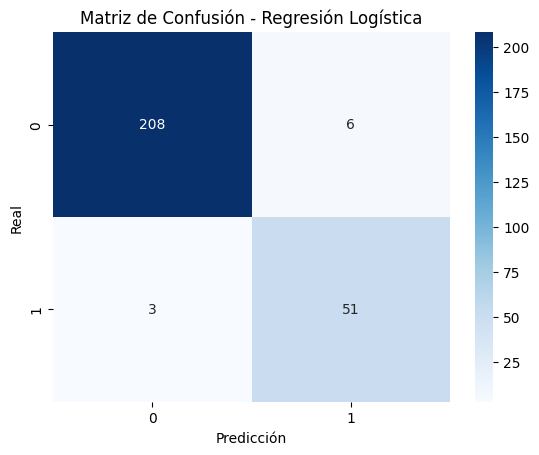

Reporte de Clasificación:
               precision    recall  f1-score   support

          no       0.99      0.97      0.98       214
         yes       0.89      0.94      0.92        54

    accuracy                           0.97       268
   macro avg       0.94      0.96      0.95       268
weighted avg       0.97      0.97      0.97       268

ROC-AUC: 0.9915195569401177


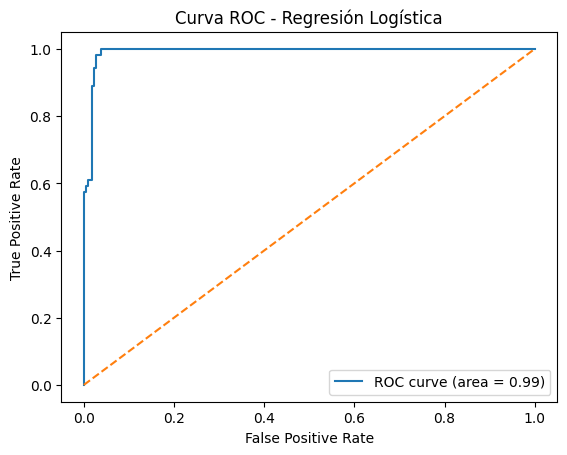

In [210]:
from sklearn.preprocessing import LabelEncoder

# Entrenar con mejores parámetros (usando el mejor estimador del GridSearchCV)
# El mejor estimador (best_lr) ya es un pipeline que incluye el preprocesamiento.
best_log_reg_model = grid_lr2.best_estimator_

# Predecir en test
y_pred = best_log_reg_model.predict(X_test)
y_proba = best_log_reg_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Regresión Logística")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Convertir y_test a numérico para roc_auc_score y roc_curve
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Métricas
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_encoded, y_proba))

# Curva ROC
fpr, tpr, _ = roc_curve(y_test_encoded, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test_encoded, y_proba):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Regresión Logística')
plt.legend()
plt.show()

### Evaluación del Mejor Modelo de Árbol de Decisión

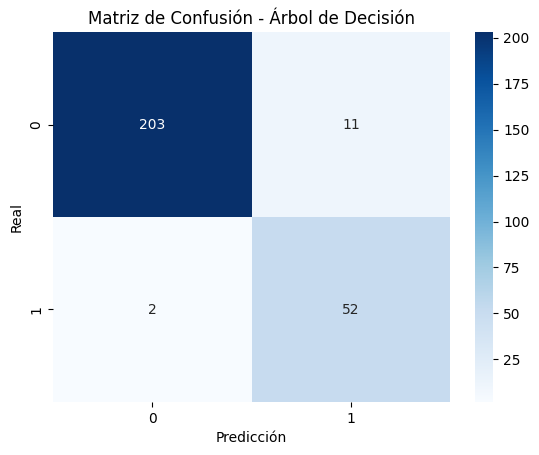

Reporte de Clasificación para Árbol de Decisión:
               precision    recall  f1-score   support

          no       0.99      0.95      0.97       214
         yes       0.83      0.96      0.89        54

    accuracy                           0.95       268
   macro avg       0.91      0.96      0.93       268
weighted avg       0.96      0.95      0.95       268

ROC-AUC para Árbol de Decisión: 0.9681118033921772


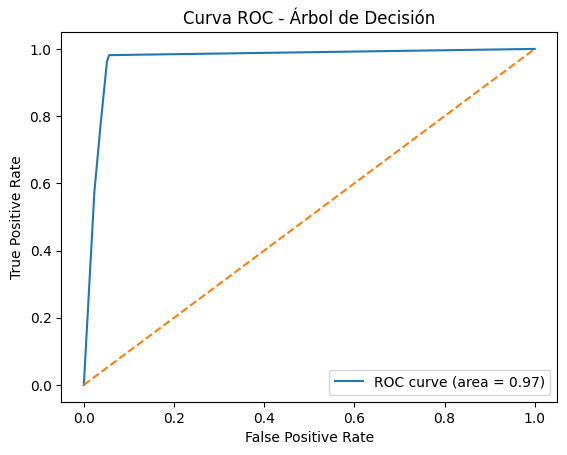

In [211]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Obtener el mejor estimador del GridSearchCV para Árbol de Decisión
best_dt_model = grid_ar2.best_estimator_

# Predecir en test
y_pred_dt = best_dt_model.predict(X_test)
y_proba_dt = best_dt_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Convertir y_test a numérico para roc_auc_score y roc_curve
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)

# Métricas
print("Reporte de Clasificación para Árbol de Decisión:\n", classification_report(y_test, y_pred_dt))
print("ROC-AUC para Árbol de Decisión:", roc_auc_score(y_test_encoded, y_proba_dt))

# Curva ROC
fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, y_proba_dt)
plt.plot(fpr_dt, tpr_dt, label=f'ROC curve (area = {roc_auc_score(y_test_encoded, y_proba_dt):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Árbol de Decisión')
plt.legend()
plt.show()

### Evaluación del Mejor Modelo KNN

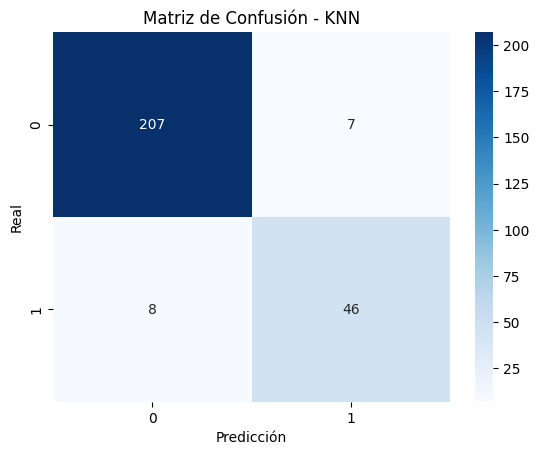

Reporte de Clasificación para KNN:
               precision    recall  f1-score   support

          no       0.96      0.97      0.97       214
         yes       0.87      0.85      0.86        54

    accuracy                           0.94       268
   macro avg       0.92      0.91      0.91       268
weighted avg       0.94      0.94      0.94       268

ROC-AUC para KNN: 0.9734769816545518


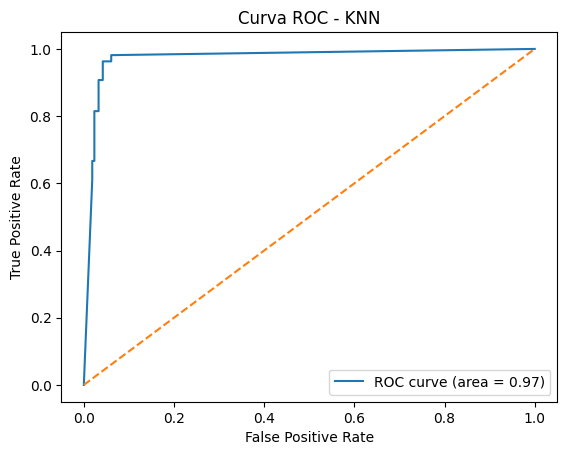

In [212]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Obtener el mejor estimador del GridSearchCV para KNN
best_knn_model = grid_knn2.best_estimator_

# Predecir en test
y_pred_knn = best_knn_model.predict(X_test)
y_proba_knn = best_knn_model.predict_proba(X_test)[:, 1]

# Matriz de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - KNN")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Convertir y_test a numérico para roc_auc_score y roc_curve
le = LabelEncoder()
y_test_encoded = le.fit_transform(y_test)


# Métricas
print("Reporte de Clasificación para KNN:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC para KNN:", roc_auc_score(y_test_encoded, y_proba_knn))

# Curva ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test_encoded, y_proba_knn)
plt.plot(fpr_knn, tpr_knn, label=f'ROC curve (area = {roc_auc_score(y_test_encoded, y_proba_knn):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - KNN')
plt.legend()
plt.show()

El proyecto comenzó con un Análisis Exploratorio de Datos (EDA) inicial sobre el conjunto de datos de seguros. Durante el EDA, se cargaron los datos, se revisó su estructura, se manejó un duplicado y se verificaron los valores nulos (no se encontraron). Se exploraron las distribuciones y correlaciones de las variables.

Basado en el EDA y la problemática planteada, se eligió un problema específico de clasificación: predecir el **target ('Changes')** y ademasn se incluye un analis´s especial de si un individuo es **fumador ('smoker')**basándose en otras características como edad, sexo, IMC, número de hijos y región. Este es un problema relevante ya que el estado de fumador suele tener un impacto significativo en los costos de seguro de salud.

Luego, se implementaron y evaluaron tres modelos de clasificación:

- Regresión Logística: Se entrenó y evaluó utilizando validación cruzada y se optimizaron los hiperparámetros con GridSearchCV. El mejor modelo se evaluó en el conjunto de prueba, obteniendo métricas como la matriz de confusión, reporte de clasificación, ROC-AUC y curva ROC.
- Árbol de Decisión: Similarmente, se implementó, optimizó con GridSearchCV y evaluó en el conjunto de prueba, generando las mismas métricas de rendimiento.
- K-Nearest Neighbors (KNN): Se siguió el mismo proceso de implementación, optimización con GridSearchCV y evaluación en el conjunto de prueba, obteniendo sus respectivas métricas.

En resumen, se ha realizado el preprocesamiento de los datos para adecuarlos a los modelos de clasificación, se han entrenado y optimizado tres algoritmos diferentes y se han evaluado sus rendimientos utilizando métricas comunes de clasificación.

# Conclusión general:

Basándonos en las métricas de evaluación, la **Regresión Logística** parece ser el modelo con mejor rendimiento para predecir si un individuo es fumador en este conjunto de datos, logrando una alta precisión y capacidad de discriminación entre las clases. El Árbol de Decisión también es una alternativa fuerte, mientras que el KNN tuvo un rendimiento ligeramente inferior en este caso particular.

Es importante recordar que estos resultados se basan en el conjunto de datos de prueba utilizado y los hiperparámetros optimizados. Para una evaluación más completa, se podría considerar probar otros modelos, realizar ingeniería de características adicional o utilizar técnicas de validación más avanzadas.

**Análisis de los resultados de la Regresión Lineal:**
Error Cuadrático Medio (MSE): 0.2293
R-squared: 0.7836

**Interpretación:**
- El MSE de 0.2293 representa el promedio de los errores cuadrados entre las predicciones y los valores reales de los cargos. Un MSE más bajo indica un mejor ajuste del modelo a los datos.
- El R-squared de 0.7836 indica que aproximadamente el 78.36% de la variabilidad en los cargos puede ser explicada por las características utilizadas en el modelo.

*Conclusiones:*
- El modelo de Regresión Lineal explica una proporción significativa de la varianza en los cargos.
- La Regresión Lineal proporciona una base razonable para predecir los cargos, pero es probable que otros factores no incluidos en este modelo o modelos más complejos (no lineales) puedan mejorar la predicción.
- Para identificar los factores más importantes, se podría analizar los coeficientes del modelo de Regresión Lineal, aunque su interpretación directa puede ser limitada debido al preprocesamiento (escalado y codificación). Alternativamente, se podrían usar técnicas de importancia de características con otros modelos.